# Web Scarping for an online book store 'Diwan' 

Import used libraries

In [112]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [113]:
page = requests.get("https://diwanegypt.com/product-category/books/arabic-books/")
src = page.content
soup = BeautifulSoup(src, "lxml")
all_books = soup.find("ul", {'class': 'products columns-5'})

In [114]:
book_names=[]
book_authors=[]
book_prices=[]

Extract each book's data

In [115]:
books = all_books.find_all("li")
for book in books:
 
    name = book.find("h2", {"class": "woocommerce-loop-product__title"})
    book_names.append(name.text if name else "N/A")

    author = book.find("span", {"class": "author"})
    book_authors.append(author.text.strip() if author else "N/A")

    price = book.find("span", {"class": "woocommerce-Price-amount"})
    book_prices.append(price.text if price else "N/A")

booksdf = pd.DataFrame({
    "Book Name": book_names,
    "Author": book_authors,
    "Price": book_prices
})

Save the dataframe to CSV

In [116]:

booksdf.to_csv("diwan_books.csv", index=False, encoding='utf-8-sig')

In [117]:
df = pd.read_csv("diwan_books.csv")
df.head()


,Book Name,Author,Price
0,آموك: سعار الحب,ستيفان زفايغ,EGP240.00
1,التحول,ستيفان زفايغ,EGP480.00
2,الليلة العجيبة,ستيفان زفايغ,EGP240.00
3,سجلات الليدر شيت,سالى العقاد,EGP160.00
4,عزيزتي تارا: رسائل مثيرة للونس,غادة كريم,EGP250.00


Remove currency symbol and convert price to float

In [118]:

df["Price"] = df["Price"].str.replace("EGP", "").str.replace(",", "").str.strip()
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df.dropna(subset=["Price"], inplace=True)


In [119]:
df["Author"].value_counts().head()

Author
ستيفان زفايغ          3
سالى العقاد           1
غادة كريم             1
اسماعيل سراج الدين    1
سعيد توفيق            1
Name: count, dtype: int64

In [120]:
df["Price"].describe()

count     28.000000
mean     280.178571
std      127.304550
min      150.000000
25%      200.000000
50%      250.000000
75%      306.250000
max      750.000000
Name: Price, dtype: float64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Book Name  28 non-null     object 
 1   Author     28 non-null     object 
 2   Price      28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 804.0+ bytes


### Distribution of Book Prices

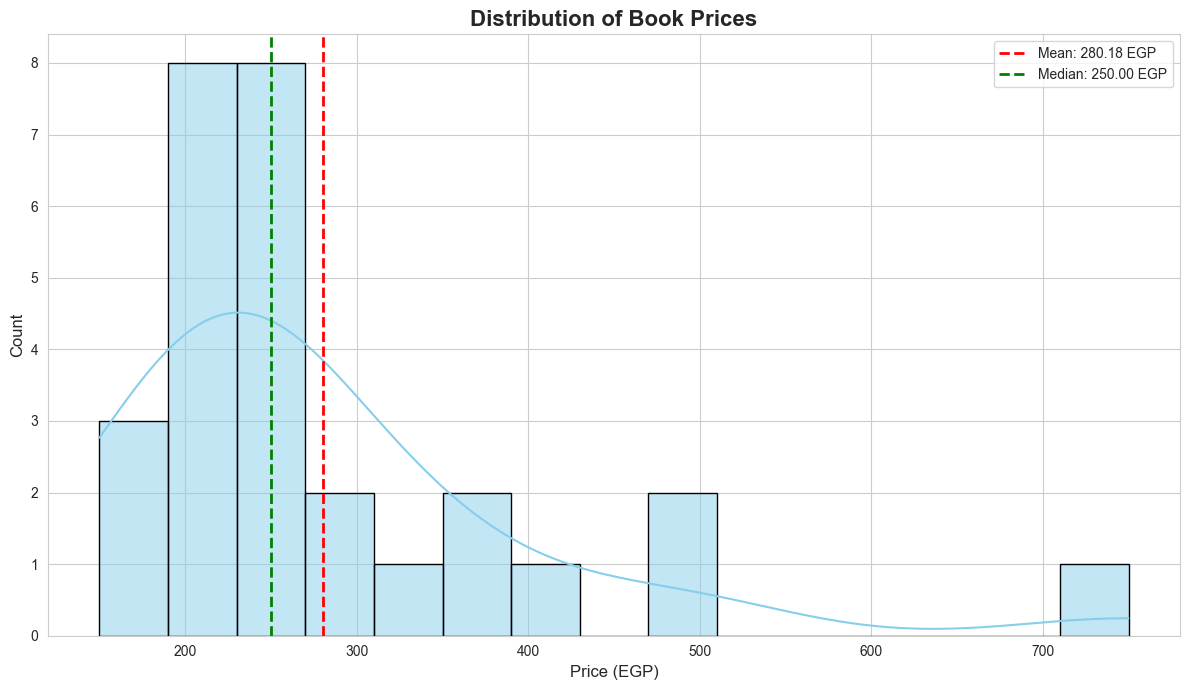

In [122]:
mean_price = df['Price'].mean()
median_price = df['Price'].median()

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.histplot(df['Price'], bins=15, kde=True, color="skyblue", edgecolor='black')
plt.axvline(mean_price, color='red', linestyle='--',  linewidth=2,label=f"Mean: {mean_price:.2f} EGP")
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f"Median: {median_price:.2f} EGP")
plt.title("Distribution of Book Prices", fontsize=16, fontweight='bold')
plt.xlabel("Price (EGP)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


### Top 10 Most Expensive Books

In [123]:
top_expensive = df.sort_values(by="Price", ascending=False).head(10)
top_expensive[["Book Name", "Author", "Price"]]

,Book Name,Author,Price
13,السريالية في مصر: الحداثة وجماعة الفن والحرية,سام بردويل,750.0
25,النص والسلطة والمجتمع: القيم السياسية في الروا...,عمار على حسن,500.0
1,التحول,ستيفان زفايغ,480.0
14,كشتبان: الأم التي طارت,اميمة صبحى,400.0
23,استكشاف كنوز وآثار الصحراء الشرقية المصرية (مص...,ارثر ويجول,350.0
9,كل شيئ عن الحب,بيل هوكس,350.0
6,ومضات من الفكر: في السياسة والدين والأخلاق و ا...,سعيد توفيق,325.0
15,الحنين إلى أسوأ حديقة حيوان في العالم,شادى لويس,300.0
11,الحشاشون: صفحات من تاريخ وأساطير النزارية,حسن حافظ,300.0
10,مقام سيدي القطقوطي,مى حمزة,250.0
